# Assignment 5
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [13]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as so

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


## Task 1: Scatterplots
### Question 1
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

<AxesSubplot:xlabel='age', ylabel='headL'>

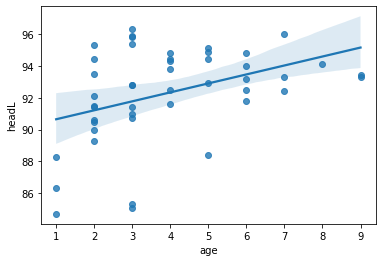

In [11]:
sns.regplot(x = 'age', y = 'headL', data = df, scatter = True)
#For both questions you can also use sns.scatterplot I just chose this to show the linear model fit

Figure 1: Scatter plot of age and head size

Written Answer: The relationship between head size and age is positive, weak, and linear with age as the explanatory variable and head length as the response variable

### Question 2. 
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

<AxesSubplot:xlabel='headL', ylabel='skullW'>

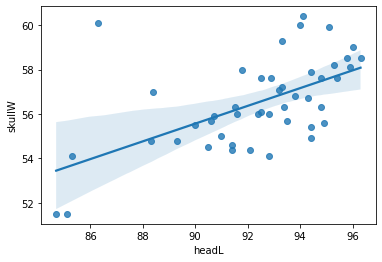

In [12]:
sns.regplot(x = 'headL', y = 'skullW', data = df, scatter = True)

Figure 2: Scatter plot of head size and skull width

Written Answer: The relationship between head size and skull width is explained as a linear, positive, and decently strong relationship with head length as the explanatory variable and skull width as the response variable.

## Task 2 Fit a linear regression line "by hand"
### Question 1
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [16]:
def simpleRegPredict(b, x):
    y_hat = b[0] + b[1]*x
    return y_hat

#Function testing
ypred = simpleRegPredict([83, 2], 2);
print(f'This is the predicted values for y: {ypred}')

This is the predicted values for y: 87


### Question 2
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

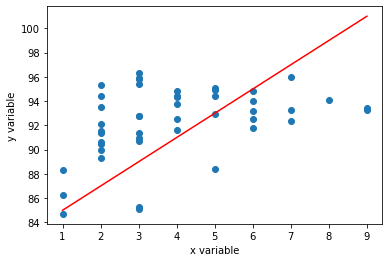

In [21]:
def plotPrediction(b, x, y, fcn = simpleRegPredict):
    #Getting scatter set up
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    plt.xlabel('x variable')
    plt.ylabel('y variable')
    
    xp = np.linspace(min(x), max(x), num = 50)
    yp = fcn(b, xp)
    ax.plot(xp, yp, 'r')

#Function testing
plotPrediction([83,2], df['age'].values, df['headL'].values)

Figure 3: Scatter plot with a linear model fit to the data of head length and age

### Question 3
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [42]:
def simpleRegLossRSS(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y-predY
    rss = sum(res**2)
    
    gradient = np.zeros(2)
    gradient[0] = -2*sum(res)
    gradient[1] = -2*sum(res*x)
    return (rss, gradient)

#Function testing
loss = simpleRegLossRSS([83, 2], df['age'].values, df['headL'].values)
print(f'This is the loss function: {loss}')

#The residential sum of squares is the first value and the derivative is the second array value that is returned from the function
#The slope would need to be decreased, and the intercept would need to increase at the same time to minimize loss

This is the loss function: (818.3900000000001, array([-128.6,   54.2]))


### Question 4
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

This is the loss function: (2537.8700000000003, array([ 638.2, 2510.6]))


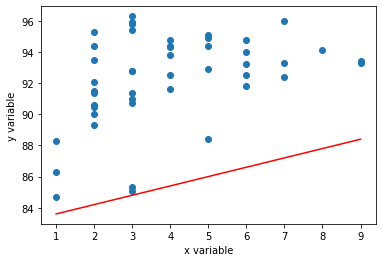

In [25]:
loss = simpleRegLossRSS([83, 0.6], df['age'].values, df['headL'].values)
plotPrediction([83,0.6], df['age'].values, df['headL'].values)
print(f'This is the loss function: {loss}')
#Loss goes way up when solely decreasing the slope

Figure 4: Scatter plot with a linear model fit to the data of head length and age

This is the loss function: (364.66999999999985, array([ 86.2, 326.6]))


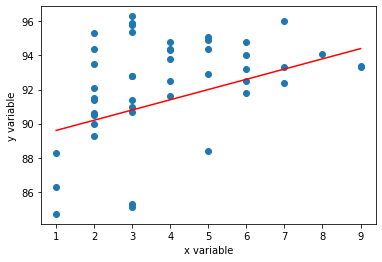

In [26]:
loss = simpleRegLossRSS([89, 0.6], df['age'].values, df['headL'].values)
plotPrediction([89,0.6], df['age'].values, df['headL'].values)
print(f'This is the loss function: {loss}')
#Loss is much better when decreasing slope and increasing intercept

Figure 5: Scatter plot with a linear model fit to the data of head length and age

This is the loss function: (345.29000000000013, array([ 61.4, 218.2]))


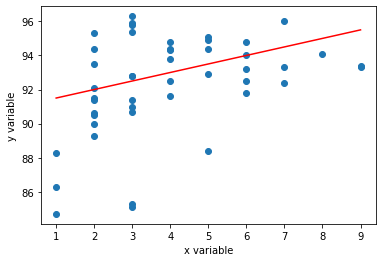

In [43]:
#This gives a residentialSS below 350 by futher increasing intercept and decreasing slope
loss = simpleRegLossRSS([91, 0.5], df['age'].values, df['headL'].values)
plotPrediction([91,0.5], df['age'].values, df['headL'].values)
print(f'This is the loss function: {loss}')

Figure 6: Scatter plot with a linear model fit to the data of head length and age

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 1
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [44]:
RESULT = so.minimize(simpleRegLossRSS, [0, 0], args = (df['age'].values, df['headL'].values), jac = True)
RESULT

      fun: 324.0206458055927
 hess_inv: array([[ 0.05082114, -0.01009765],
       [-0.01009765,  0.00255215]])
      jac: array([-4.51905180e-12, -3.36228823e-11])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([90.08288948,  0.56311585])

Written Answer: The parameter estimates are ~90.1 for the intercept and 0.56 for the slope.  The best achieved RSS is ~324.

### Question 2
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

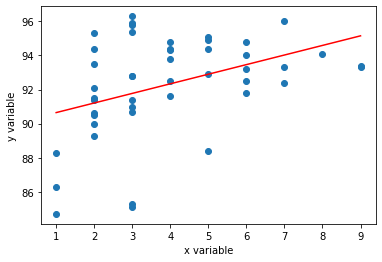

In [45]:
bOptimize = RESULT.x
plotPrediction(bOptimize, df['age'].values, df['headL'].values)

Figure 7: Scatter plot with a best linear model fit to the data of head length and age

### Question 3
Calculate the total sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [46]:
totalSS = sum((df['headL'].values - np.mean(df['headL'].values))**2)
print(f'The total sum of squares for headL is: {totalSS}')

The total sum of squares for headL is: 386.14456521739135


### Question 4
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

The R2 value is: 0.16088254246650902


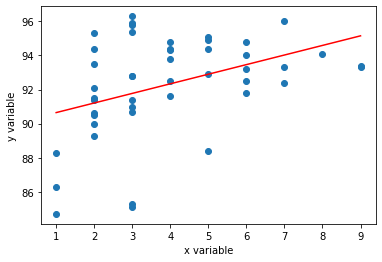

In [50]:
def simpleRegFit(x, y):
    result = so.minimize(simpleRegLossRSS, (0,0), args = (x, y), jac = True)
    bOp = result.x
    plotPrediction(bOp, x, y)
    TSS = sum((y - np.mean(y))**2)
    RSS = result.fun
    R2 = 1 - (RSS/TSS)
    return R2

#Function testing
r2Value = simpleRegFit(df['age'].values, df['headL'].values)
print(f'The R2 value is: {r2Value}')

Figure 8: Scatter plot with a best linear model fit to the data of head length and age

Written Answer: The R2 value is ~0.16 and therefore means that the fit is not that great for the modeled data.

### Question 5
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

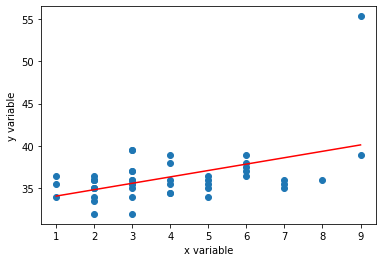

In [49]:
r2 = simpleRegFit(df['age'].values, df['tailL'].values)

Figure 9: Scatter plot with a best linear model fit to the data of tail length and age

Written Answer: The fit is very good for this linear model as seen with the graph, however, the outlier most likely increases the slope and therefore the fit would be better without it (slope would be decreased instead of how it currently is).  The outlier can be seen in the top right of the graph.